# Self Subduction Case 1

**Romain Beucher** romain.beucher (at) anu.edu.au

In [1]:
from underworld import UWGeodynamics as GEO
from underworld import visualisation as vis

loaded rc file /home/jovyan/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

In [3]:
half_rate = 1.0 * u.centimeter / u.year
model_length = 3000. * u.kilometer
surfaceTemp = 273.15 * u.degK
baseModelTemp = 1603.15 * u.degK
bodyforce = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / half_rate
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT

In [4]:
Model = GEO.Model(elementRes=(256, 128), 
                  minCoord=(-1500. * u.kilometer, -700. * u.kilometer), 
                  maxCoord=(1500. * u.kilometer, 50. * u.kilometer), 
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

In [5]:
polygon = GEO.shapes.Polygon([(-500. * u.kilometer, -0. * u.kilometer),
                              (-500. * u.kilometer, -200. * u.kilometer),
                              (-400. * u.kilometer, -200. * u.kilometer),
                              (-400. * u.kilometer, -100. * u.kilometer),
                              (1500. * u.kilometer, -100. * u.kilometer),
                              (1500. * u.kilometer, -0. * u.kilometer)])

In [6]:
stickyAir = Model.add_material(name="Mantle", shape=GEO.shapes.Layer(top=Model.top, bottom=0. * u.kilometer))
Mantle = Model.add_material(name="Mantle", shape=GEO.shapes.Layer(top=0.*u.kilometer, bottom=Model.bottom))
Lithosphere = Model.add_material(name="Lithosphere", shape=polygon)


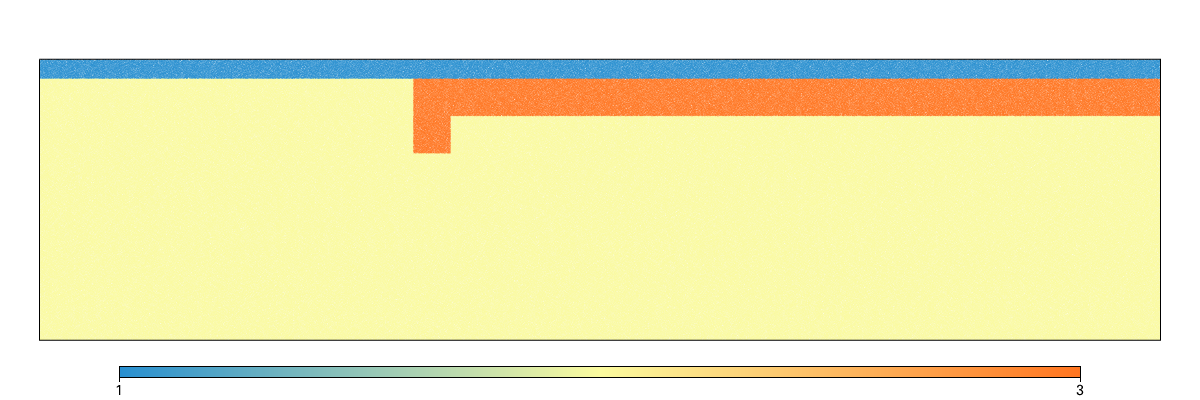

In [7]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, Model.materialField)
Fig.show()

In [9]:
import numpy as np

coords1 = GEO.nd(np.array([[-500, -200]]) * u.km) 
coords2 = GEO.nd(np.array([[-450, -200]]) * u.km) 
coords3 = GEO.nd(np.array([[-400, -200]]) * u.km)

Model.add_passive_tracers(name="tip1", vertices=coords1)
Model.add_passive_tracers(name="tip2", vertices=coords2)
Model.add_passive_tracers(name="tip3", vertices=coords3)


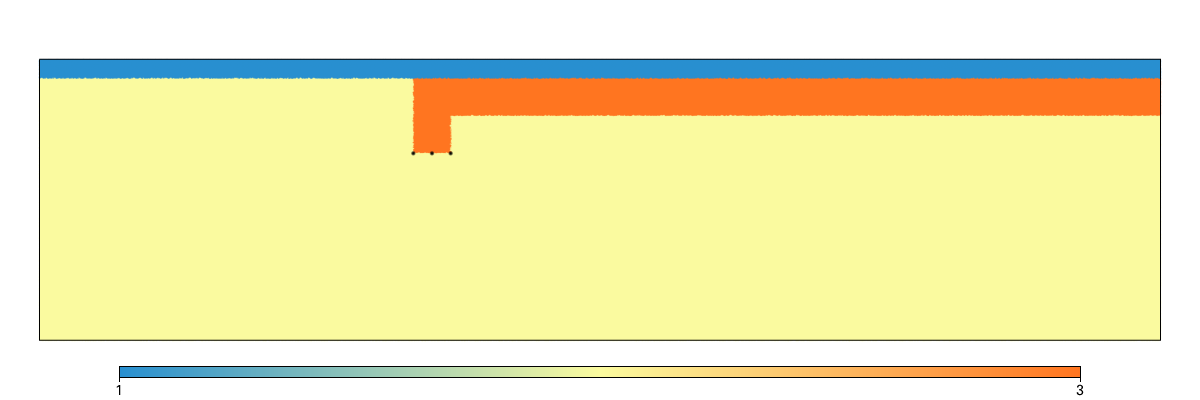

In [10]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.tip1_tracers, pointSize=5.0)
Fig.Points(Model.tip2_tracers, pointSize=5.0)
Fig.Points(Model.tip3_tracers, pointSize=5.0)
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.show()

In [10]:
stickyAir.viscosity = 1e19 * u.pascal * u.second
Mantle.viscosity = 1e21 * u.pascal * u.second
Lithosphere.viscosity = 1e23 * u.pascal * u.second

In [11]:
stickyAir.density = 1. * u.kilogram / u.metre**3
Mantle.density = 3200. * u.kilogram / u.metre**3
Lithosphere.density = 3300. * u.kilogram / u.metre**3

/opt/UWGeodynamics/UWGeodynamics/__init__.py:83: UserWarning: 'Dimensionalize' has been changed to 'dimensionalise', please use the later
  warnings.warn("""'Dimensionalize' has been changed to 'dimensionalise', please use the later""")
/usr/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)



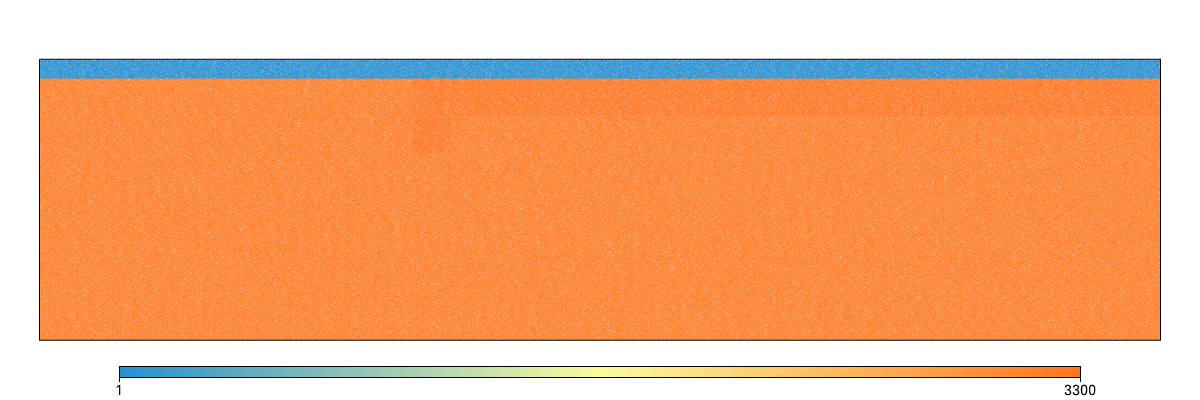

In [12]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, GEO.Dimensionalize(Model.densityField, u.kilogram / u.metre**3))
Fig.show()


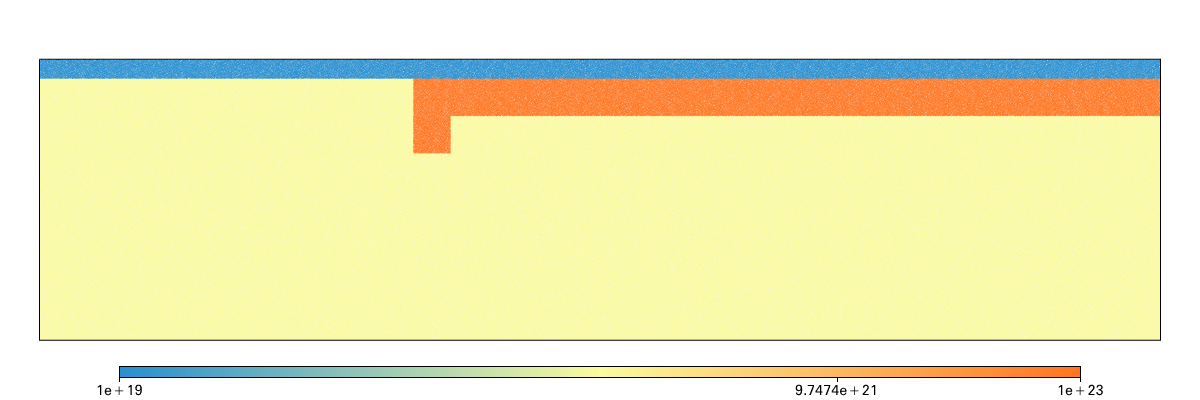

In [13]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, GEO.Dimensionalize(Model.viscosityField, u.pascal * u.second), logScale=True)
Fig.show()

In [14]:
Model.set_velocityBCs(left=[0., None],
                      right=[0., None],
                      bottom=[None, 0.],
                      top=[None, 0.])

In [15]:
Model.init_model(pressure="lithostatic")

In [16]:
Model.solver.set_inner_method("mumps")
Model.solver.set_penalty(1e6)

In [17]:
!rm -rf outputs
Model.run_for(nstep=1)

Running with UWGeodynamics version 2.9.3
Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type preonly -A11_pc_type lu -A11_pc_factor_mat_solver_type mumps -scr_ksp_type fgmres -scr_ksp_rtol 1e-05 -A11_mg_active False
Step:     1 Model Time: 4212.1 year dt: 4212.1 year (2020-03-25 22:40:14)


1


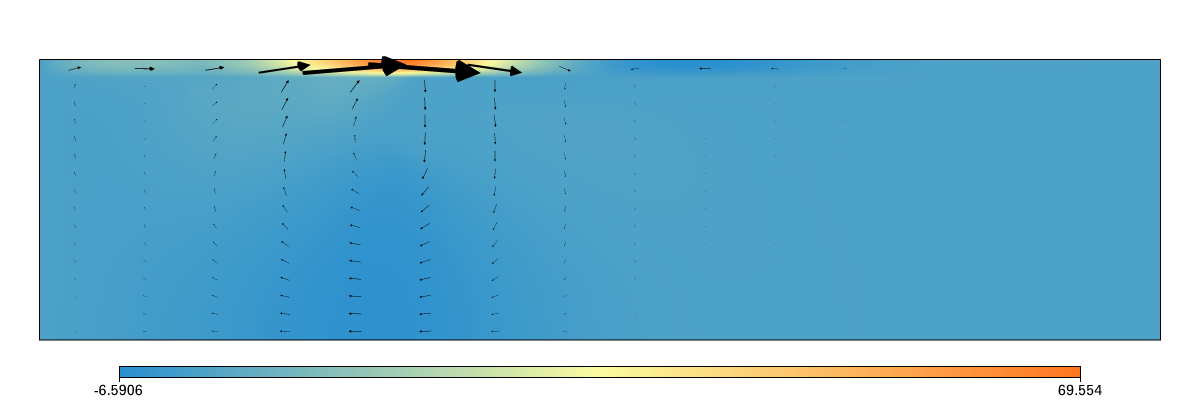

In [18]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Surface(Model.mesh, Model.velocityField[0])
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.show()